<a href="https://colab.research.google.com/github/hoantran14/CNN1/blob/main/food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 283 images belonging to 18 classes.
Found 62 images belonging to 18 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 18)                  │           2,322 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,306,962 (12.62 MB)

 Trainable params: 3,306,962 (12.62 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 114s 13s/step - accuracy: 0.0744 - loss: 3.3797 - val_accuracy: 0.0806 - val_loss: 2.8490
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.0556 - loss: 2.8665 - val_accuracy: 0.1452 - val_loss: 2.7675
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.0896 - loss: 2.8731 - val_accuracy: 0.1129 - val_loss: 2.8020
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.0978 - loss: 2.8174 - val_accuracy: 0.1290 - val_loss: 2.7646
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.0999 - loss: 2.7959 - val_accuracy: 0.1613 - val_loss: 2.7597
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.1049 - loss: 2.8012 - val_accuracy: 0.1452 - val_loss: 2.6973
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.1537 - loss: 2.7175 - val_accuracy: 0.2097 - val_loss: 2.6217
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.1199 - loss: 2.7372 - val_accuracy: 0.2097 - val_loss: 2.569

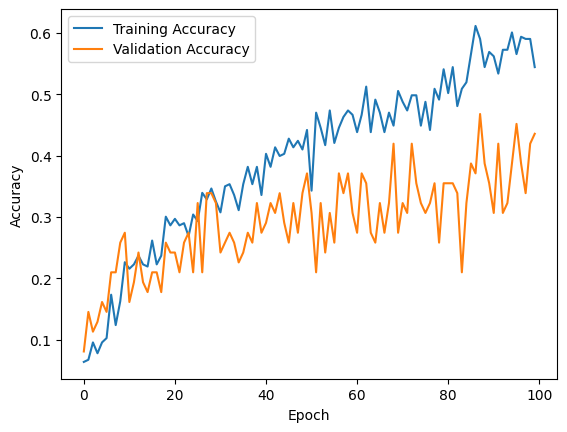

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


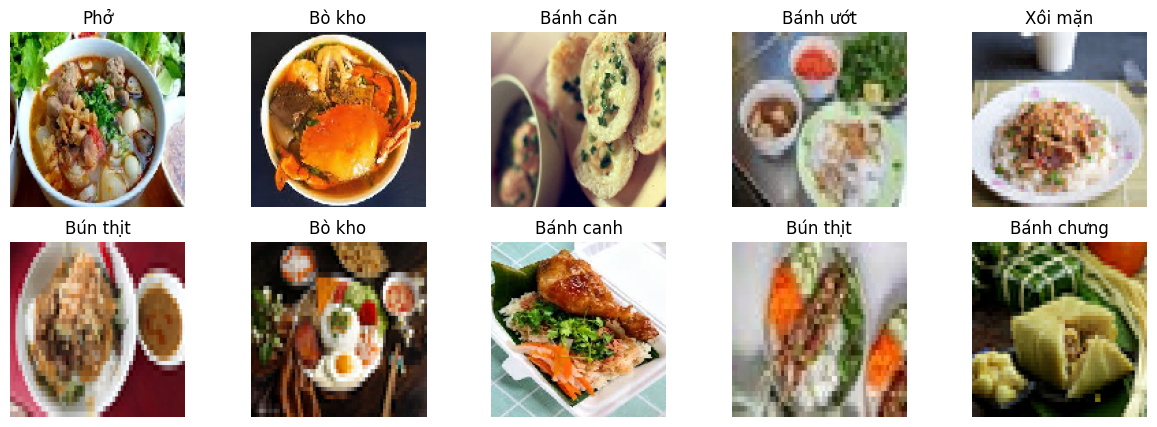

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


train_dir = "/content/drive/MyDrive/Dữ liệu cho AI/Foods"


img_width, img_height = 128, 128
batch_size = 32


train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2
)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)


validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()


epochs = 100
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)


plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


image_paths = [
    "/content/drive/MyDrive/Dữ liệu cho AI/Foods/Bánh canh/images (2).jfif",
    "/content/drive/MyDrive/Dữ liệu cho AI/Foods/Bánh canh/images (7).jfif",
    "/content/drive/MyDrive/Dữ liệu cho AI/Foods/Bánh căn/IMG_0487.JPG",
    "/content/drive/MyDrive/Dữ liệu cho AI/Foods/Bánh ướt/banh-cuon-1_QVIX.jpg",
    "/content/drive/MyDrive/Dữ liệu cho AI/Foods/Xôi mặn/cach-che-bien-xoi-man-ga-xe.jpg",
    "/content/drive/MyDrive/Dữ liệu cho AI/Foods/Bún thịt/quan-bun-thit-nuong-ngon-da-nang-08.jpg",
    "/content/drive/MyDrive/Dữ liệu cho AI/Foods/Cơm tấm/7-Hoan-thien-thanh-pham-1-6244-1709800134.jpg",
    "/content/drive/MyDrive/Dữ liệu cho AI/Foods/Xôi mặn/images (1).jfif",
    "/content/drive/MyDrive/Dữ liệu cho AI/Foods/Bún thịt/bun-thit-nuong-bao-nhieu-calo-cach-an-giam-can-0-800x450.jpg",
    "/content/drive/MyDrive/Dữ liệu cho AI/Foods/Bánh chưng/13-chung-tet-td.jpg"
]


processed_images = []
for path in image_paths:
    img = load_img(path, target_size=(img_width, img_height))
    img = img_to_array(img) / 255.0
    processed_images.append(img)


processed_images = np.array(processed_images)


predictions = np.argmax(model.predict(processed_images), axis=-1)

class_labels = {v: k for k, v in train_generator.class_indices.items()}


plt.figure(figsize=(15, 5))
for i, path in enumerate(image_paths):
    img = load_img(path, target_size=(img_width, img_height))
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"{class_labels[predictions[i]]}")
plt.show()


